In [25]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [27]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [28]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [29]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(df_market_data)

# Display sample normalized data
market_data_scaled[:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [30]:
print(df_market_data.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [33]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(market_data_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original DataFrame
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_data_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
df_market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [34]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))


In [35]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)


In [36]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


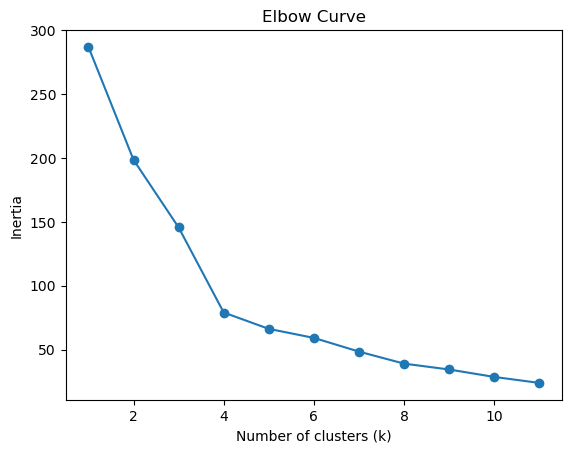

In [37]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [38]:
# Initialize the K-Means model using the best value for k (it's k = 4)
model = KMeans(n_clusters=4, random_state=0)


In [39]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_data_scaled)


KMeans(n_clusters=4, random_state=0)

In [40]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predictions = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(predictions)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [41]:
# Create a copy of the scaled DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()


In [42]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled_copy['predicted_clusters'] = predictions

# Display the copy of the scaled DataFrame
df_market_data_scaled_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [43]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
import hvplot.pandas

scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="predicted_clusters",
    hover_cols=["coin_id"],
    title="Scatter Plot of Cryptocurrencies by Predicted Clusters"
)
scatter_plot


:NdOverlay   [predicted_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [44]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)


In [45]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)

# View the scaled PCA data
pca_data[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [46]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** .895

In [47]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
df_pca['coin_id'] = df_market_data_scaled.index

# Set the coin_id column as index
df_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [48]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))


In [50]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_pca)
    inertia.append(model.inertia_)


In [51]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


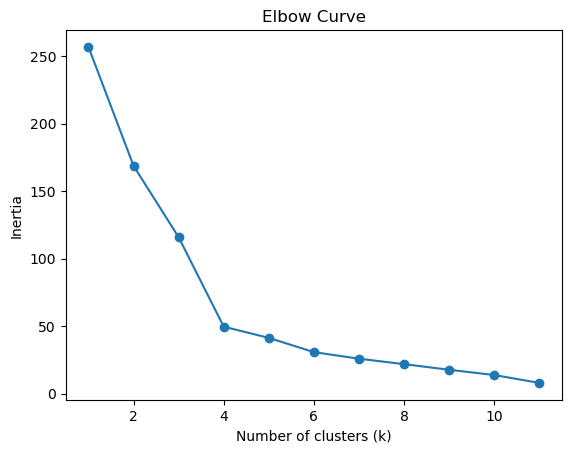

In [52]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [53]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)


In [54]:
# Fit the K-Means model using the PCA data
model.fit(df_pca)


KMeans(n_clusters=4, random_state=0)

In [55]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predictions_pca = model.predict(df_pca)

# Print the resulting array of cluster values.
print(predictions_pca)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [56]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['predicted_clusters'] = predictions_pca

# Display the copy of the scaled PCA DataFrame
df_pca_copy.head()


,PC1,PC2,PC3,predicted_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [57]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
import hvplot.pandas

scatter_plot_pca = df_pca_copy.reset_index().hvplot.scatter(
    x="PC1",
    y="PC2",
    by="predicted_clusters",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters (PCA Data)"
)
scatter_plot_pca


:NdOverlay   [predicted_clusters]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

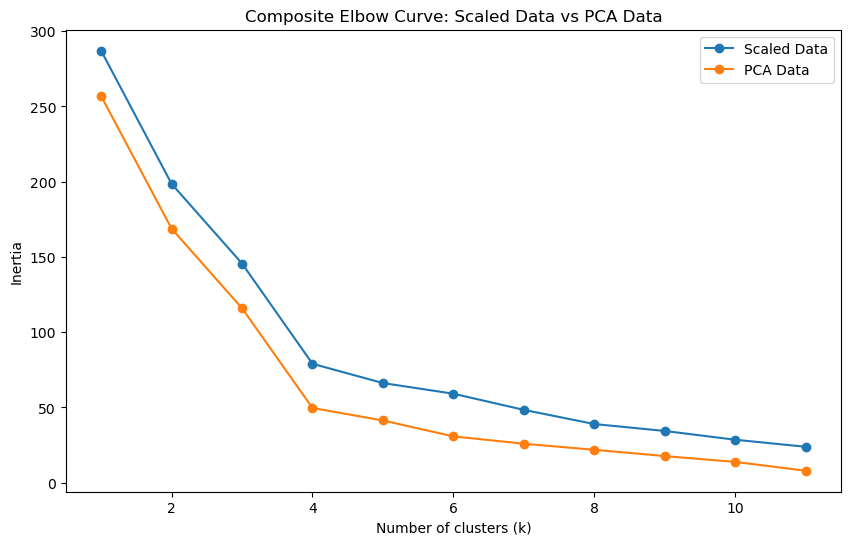

In [58]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Compute inertia for the scaled data
inertia_scaled = []
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_data_scaled)
    inertia_scaled.append(model.inertia_)

# Compute inertia for the PCA data
inertia_pca = []
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_pca)
    inertia_pca.append(model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k, inertia_scaled, marker='o', label='Scaled Data')
plt.plot(k, inertia_pca, marker='o', label='PCA Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Composite Elbow Curve: Scaled Data vs PCA Data')
plt.legend()
plt.show()


In [59]:
# Composite plot to contrast the clusters
composite_plot = (scatter_plot + scatter_plot_pca).cols(2)
composite_plot


:Layout
   .NdOverlay.I  :NdOverlay   [predicted_clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [predicted_clusters]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** We captured more significant patterns while discarding lower-variance detaisl. Clusters are more general, some detail is lost, and easier to interpret.